<a href="https://colab.research.google.com/github/abrahamt-e/cnn-test/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#convert mnist image into a tensor of 4 dimensions
transform = transforms.ToTensor()
#train data
train_data= datasets.MNIST(root='CNN_data',train=True, download=True,transform=transform)


In [10]:
test_data= datasets.MNIST(root='CNN_data',train=False, download=True,transform=transform)


In [17]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: CNN_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [19]:
#create a small batch size for images eg.10
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=True)


In [20]:
#define our cnn model
#describe cnn and what its oding (2 layers)

conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)

In [38]:
#grab one mnist record
for i,(X_train,y_train) in enumerate(train_data):
  break

In [39]:
x=X_train.view(1,1,28,28)

In [40]:
x=F.relu(conv1(x))#rectified linear unit for our activation function

In [41]:
x.shape

torch.Size([1, 6, 26, 26])

In [44]:
x=F.max_pool2d(x,2,2)

In [45]:
x.shape

torch.Size([1, 6, 13, 13])

In [46]:
x=F.relu(conv2(x))

In [48]:
x.shape#since no padding u lose 2 pixels

torch.Size([1, 16, 11, 11])

In [49]:
x=F.max_pool2d(x,2,2)

In [50]:
x.shape#round down since u cant invent data to round up

torch.Size([1, 16, 5, 5])

In [57]:
#model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,X):
    X=F.relu(conv1(X))
    X=F.max_pool2d(X,2,2)
    #second layer
    X=F.relu(conv2(X))
    X=F.max_pool2d(X,2,2)

    X=X.view(-1,16*5*5)  #-1 tp vary batch size

    #fully connected layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return F.log_softmax(X,dim=1)








In [70]:
#create an instance of model

torch.manual_seed(41)
model =ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [71]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Smaller the Learning Rate, longer its gonna take to train.


In [77]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
    trn_corr += batch_corr # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')


Epoch: 0  Batch: 600  Loss: 0.009843194857239723
Epoch: 0  Batch: 1200  Loss: 0.025891846045851707
Epoch: 0  Batch: 1800  Loss: 0.028839847072958946
Epoch: 0  Batch: 2400  Loss: 0.00687809893861413
Epoch: 0  Batch: 3000  Loss: 0.0322798416018486
Epoch: 0  Batch: 3600  Loss: 0.3888096809387207
Epoch: 0  Batch: 4200  Loss: 0.2515696585178375
Epoch: 0  Batch: 4800  Loss: 0.03808101266622543
Epoch: 0  Batch: 5400  Loss: 0.11272760480642319
Epoch: 0  Batch: 6000  Loss: 0.13574180006980896
Epoch: 1  Batch: 600  Loss: 0.00424599926918745
Epoch: 1  Batch: 1200  Loss: 0.01942053809762001
Epoch: 1  Batch: 1800  Loss: 0.022795112803578377
Epoch: 1  Batch: 2400  Loss: 0.04123236984014511
Epoch: 1  Batch: 3000  Loss: 0.08277624845504761
Epoch: 1  Batch: 3600  Loss: 0.00782872550189495
Epoch: 1  Batch: 4200  Loss: 0.02034028060734272
Epoch: 1  Batch: 4800  Loss: 0.008747255429625511
Epoch: 1  Batch: 5400  Loss: 0.15311625599861145
Epoch: 1  Batch: 6000  Loss: 0.3388604521751404
Epoch: 2  Batch: 600 

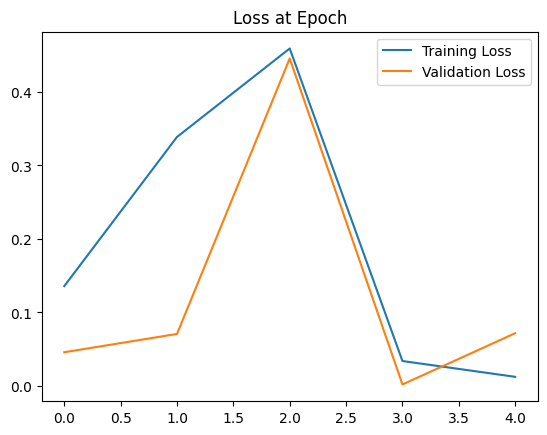

In [78]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()


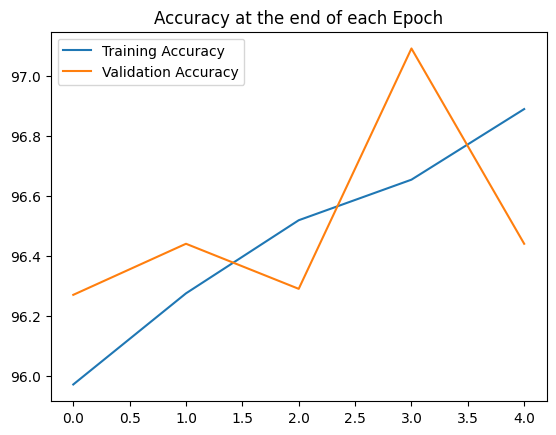

In [79]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()


In [84]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()
correct.item()/len(test_data)*100

96.44

In [88]:
#grab in image
test_data[4143] #gives a tensir with umage
test_data[4143][0]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

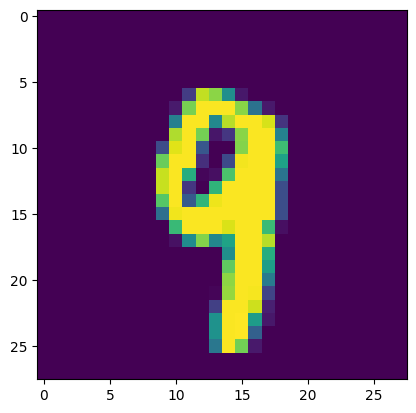

In [91]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [93]:
model.eval()
with torch.no_grad():
  new_prediction=model(test_data[4143][0].view(1,1,28,28))#1 btach size ,color panel, 28x28 image


In [94]:
new_prediction

tensor([[-1.6414e+01, -1.6662e+01, -1.4350e+01, -9.9015e+00, -6.3769e+00,
         -1.1235e+01, -2.3835e+01, -6.8502e+00, -8.3721e+00, -3.0595e-03]])

In [95]:
new_prediction.argmax()

tensor(9)